# Importing Libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

# Data Importing

In [107]:
full_table = pd.read_csv('I:/ime/SMBA/Finaldata.csv')
full_table.head()

,Country,Year,gdppercapita,suicidesrate,Female,Male,SEX Ratio,MODE AGE
0,Argentina,1991,6404,9.94,15133000,14490000,0.957510,35-54 YEAR
1,Argentina,2001,7900,11.96,17438298,16572648,0.950359,35-54 YEAR
2,Argentina,2011,13946,8.82,19491572,18524167,0.950368,35-54 YEAR
3,Austria,1991,23808,29.62,3812047,3487681,0.914910,35-54 YEAR
4,Austria,2001,25848,21.83,3949662,3684898,0.932965,35-54 YEAR


# Data Checking

In [108]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       117 non-null    object 
 1   Year          117 non-null    int64  
 2   gdppercapita  117 non-null    int64  
 3   suicidesrate  117 non-null    float64
 4   Female        117 non-null    int64  
 5   Male          117 non-null    int64  
 6   SEX Ratio     117 non-null    float64
 7   MODE AGE      117 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 7.4+ KB


In [109]:
#missing values
full_table.isna().sum()

Country         0
Year            0
gdppercapita    0
suicidesrate    0
Female          0
Male            0
SEX Ratio       0
MODE AGE        0
dtype: int64

# Exploratory data Analysis

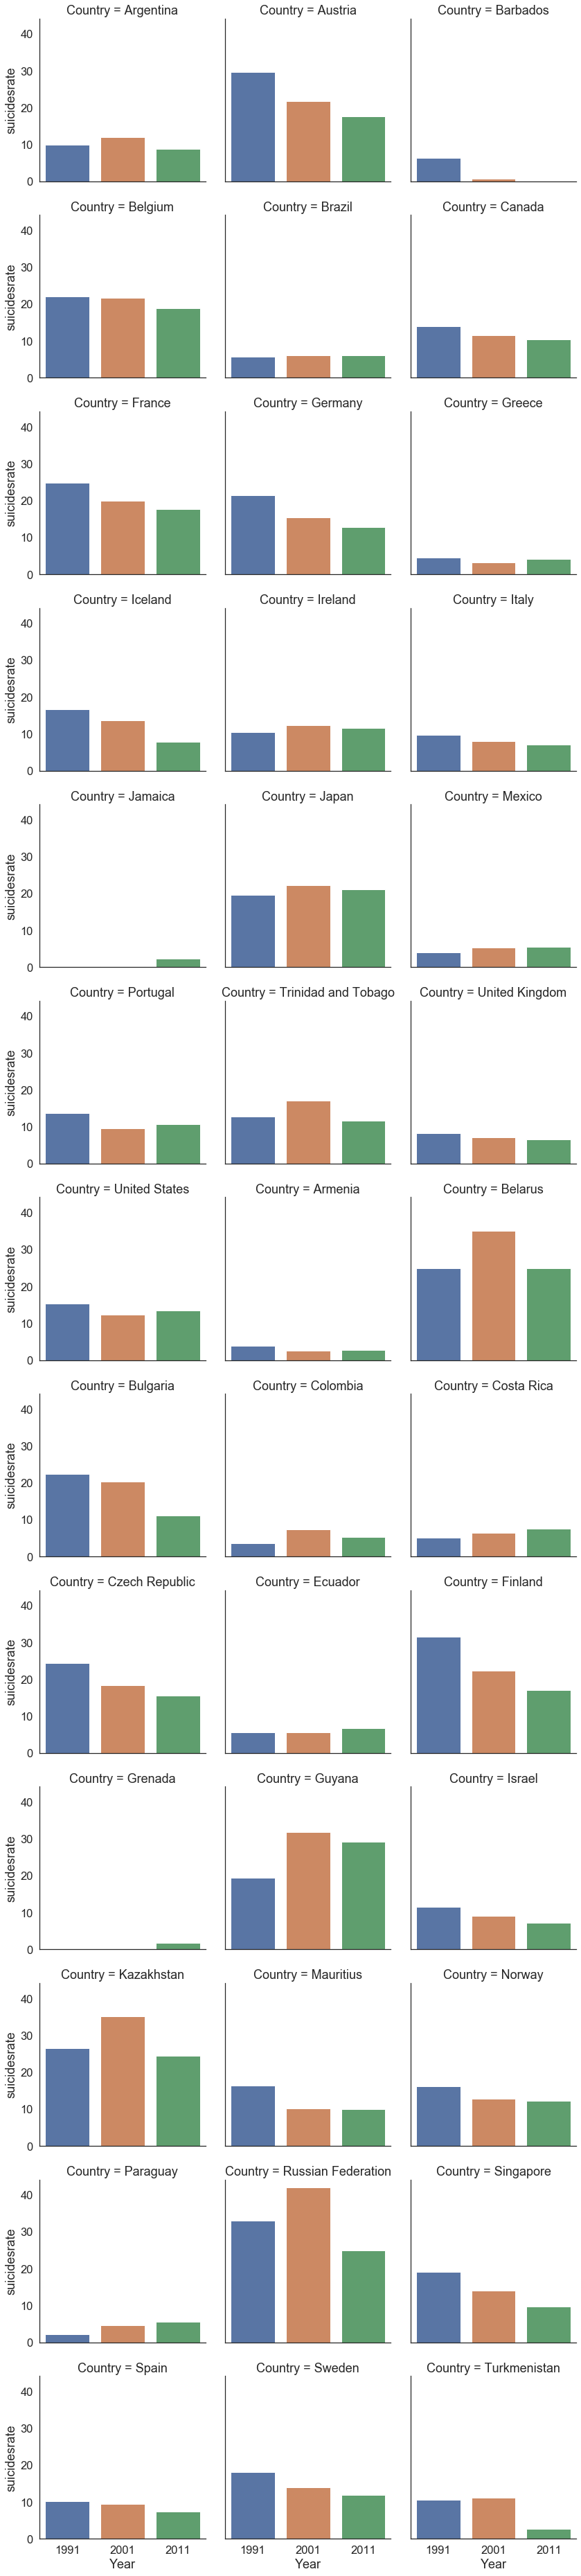

In [146]:
sns.catplot(x="Year", y="suicidesrate", col="Country",

                data=full_table, kind="bar",

                height=4, aspect=1,col_wrap=3,estimator=mean);
sns.set(style="white",font_scale=1.5)

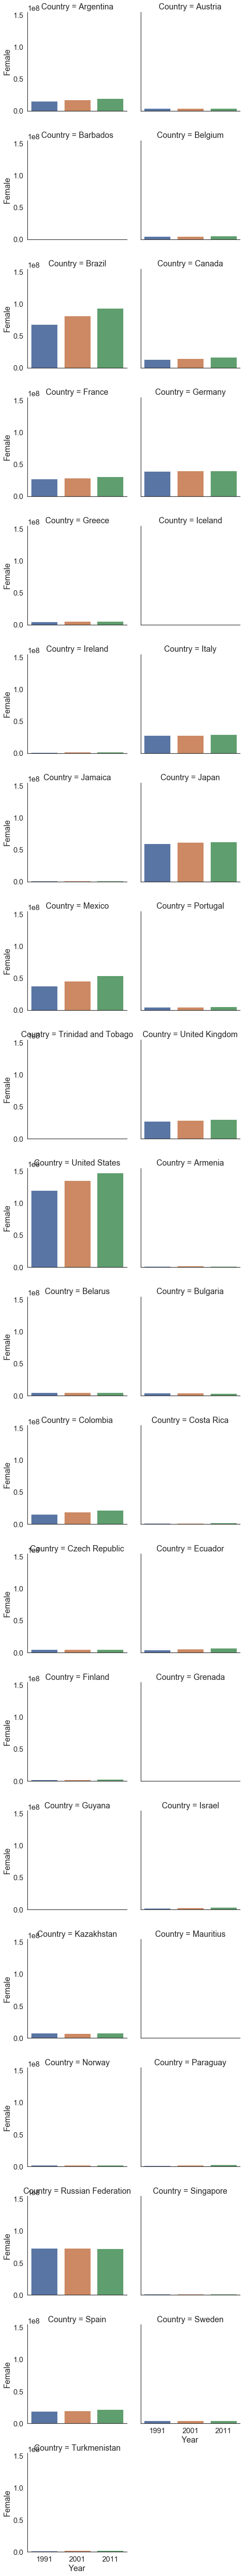

In [158]:
sns.catplot(x="Year", y="Female", col="Country",

                data=full_table, kind="bar",

                height=4, aspect=1,col_wrap=2,estimator=mean);
sns.set(style="white",font_scale=2)

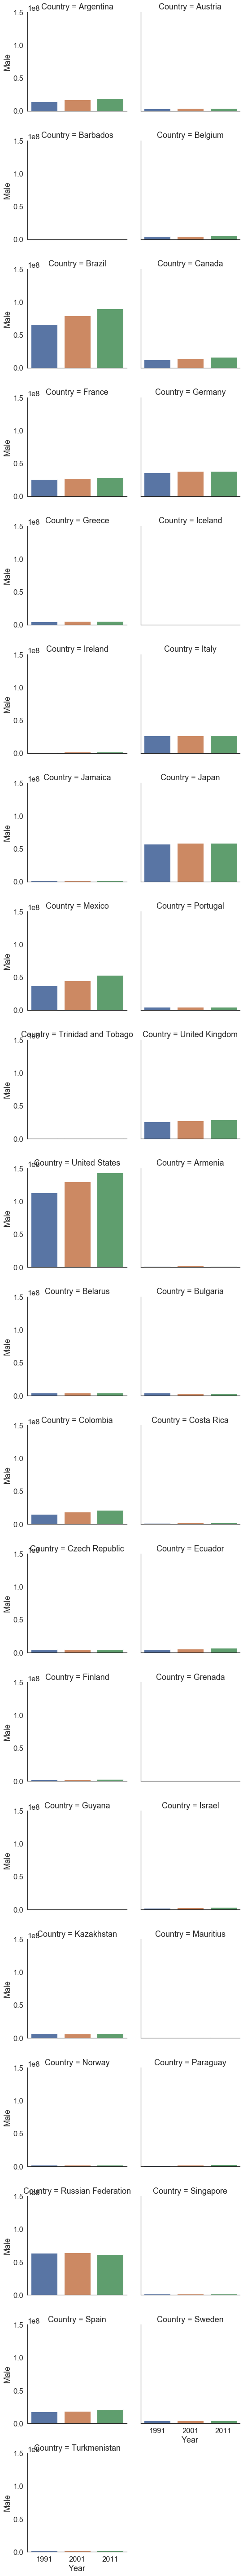

In [157]:
sns.catplot(x="Year", y="Male", col="Country",

                data=full_table, kind="bar",

                height=4, aspect=1,col_wrap=2,estimator=mean);
sns.set(style="white",font_scale=1.5)

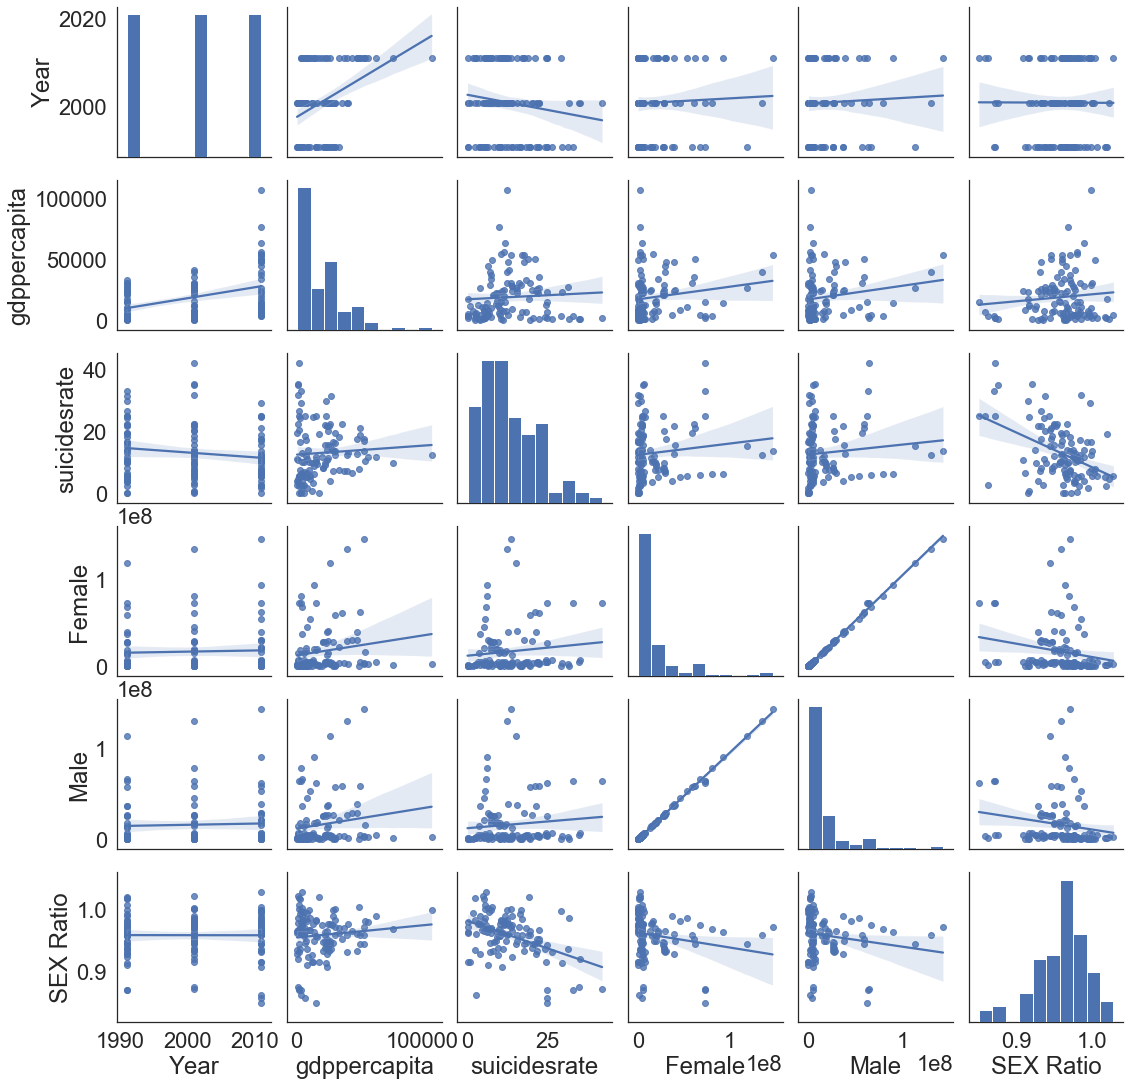

In [164]:
sns.pairplot(full_table,kind="reg")

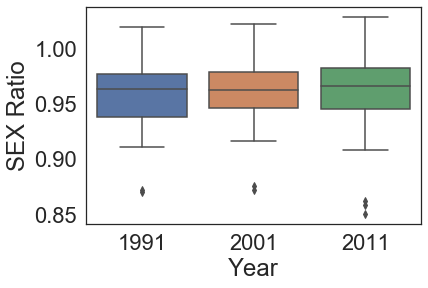

In [168]:
sns.boxplot(x="Year",y="SEX Ratio",data=full_table)
plt.show()

In [ ]:
sns.boxplot(x="Year",y="SEX Ratio",data=full_table)
plt.show()

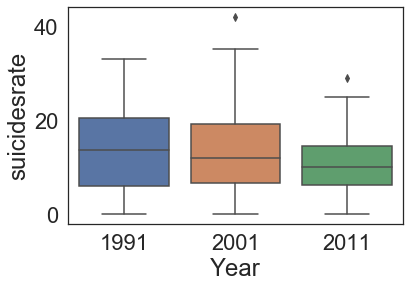

In [169]:
sns.boxplot(x="Year",y="suicidesrate",data=full_table)
plt.show()

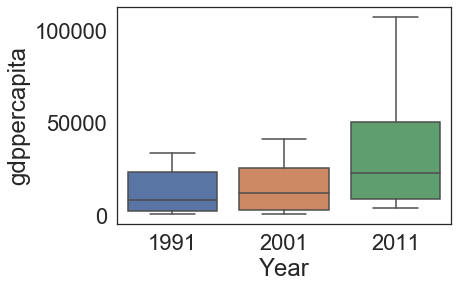

In [172]:
sns.boxplot(x="Year",y="gdppercapita",data=full_table)
plt.show()

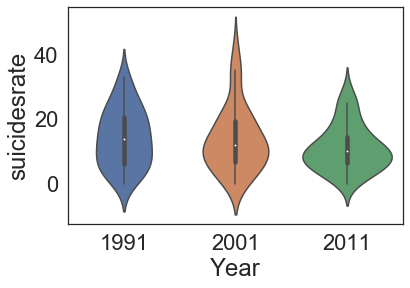

In [174]:
sns.violinplot(x="Year",y="suicidesrate",data=full_table)
plt.show()

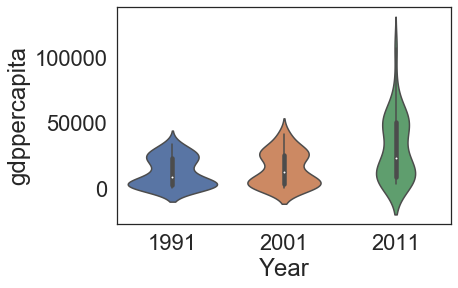

In [175]:
sns.violinplot(x="Year",y="gdppercapita",data=full_table)
plt.show()

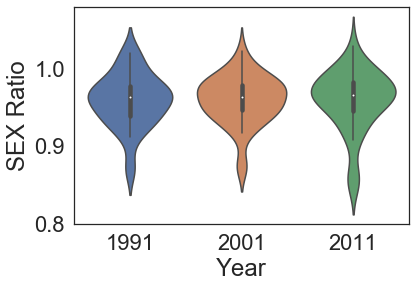

In [176]:
sns.violinplot(x="Year",y="SEX Ratio",data=full_table)
plt.show()

# Descriptive statistics

In [161]:
full_table.corr()['suicidesrate'].sort_values()

SEX Ratio      -0.442696
Year           -0.146387
gdppercapita    0.062161
Male            0.097306
Female          0.116054
suicidesrate    1.000000
Name: suicidesrate, dtype: float64

[Text(0.5, 0, 'Year'),
 Text(1.5, 0, 'gdppercapita'),
 Text(2.5, 0, 'suicidesrate'),
 Text(3.5, 0, 'Female'),
 Text(4.5, 0, 'Male'),
 Text(5.5, 0, 'SEX Ratio')]

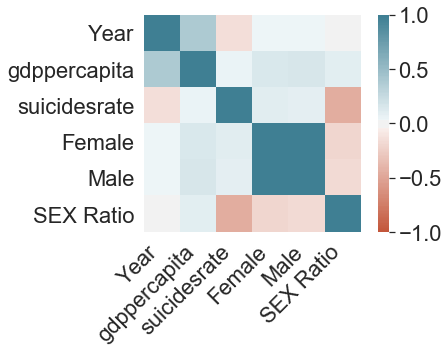

In [162]:
corr = full_table.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [163]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Year,gdppercapita,suicidesrate,Female,Male,SEX Ratio
Year,1.00,0.39,-0.15,0.04,0.04,-0.00
gdppercapita,0.39,1.00,0.06,0.15,0.16,0.11
suicidesrate,-0.15,0.06,1.00,0.12,0.10,-0.44
Female,0.04,0.15,0.12,1.00,1.00,-0.19
Male,0.04,0.16,0.10,1.00,1.00,-0.17
SEX Ratio,-0.00,0.11,-0.44,-0.19,-0.17,1.00


In [125]:
g=full_table.groupby('Year')
g


In [133]:
count=[]
years=[]
for Year,y in g:
    print(Year)
    suicides=y['suicidesrate'].mean()
    count.append(suicides)
    years.append(Year)
    print(y)

1991
                 Country  Year  gdppercapita  suicidesrate     Female  \
0              Argentina  1991          6404      9.940000   15133000   
3                Austria  1991         23808     29.620000    3812047   
6               Barbados  1991          8469      6.410000     124000   
9                Belgium  1991         22523     22.000000    4818100   
12                Brazil  1991          4490      5.700000   67955648   
15                Canada  1991         24038     13.980000   12911600   
18                France  1991         23821     24.840000   27429500   
21               Germany  1991         24662     21.510000   39141800   
24                Greece  1991         10816      4.550000    4942931   
27               Iceland  1991         28857     16.640000     118000   
30               Ireland  1991         15328     10.540000    1639100   
33                 Italy  1991         22805      9.660000   28089700   
36               Jamaica  1991          1889  

In [134]:
years

[1991, 2001, 2011]

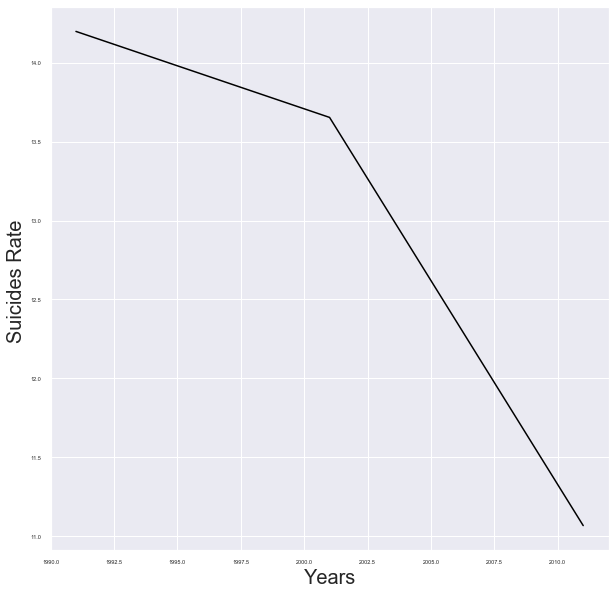

In [136]:
plt.figure(figsize=(10,10))
plt.plot(years,count,color='black')
sns.set(font_scale=0.25)

plt.xlabel('Years',size=20)
plt.ylabel('Suicides Rate ',size=20)

plt.show()